# Desafío: Aguas Venenosas

Los aldeanos de la isla en la que te encuentras son víctimas de conflictos entre tribus. El
método más usado para resolver conflictos ha sido el envenenamiento de aguas enemigas.

Una de las tribus está diseñando un detector de veneno. Ellos lograron identificar las 10 características mínimas y requeridas que hacen de una sustancia una sustancia venenosa para su especie (`veneno.csv`).
Tu has recibido un dataset (`sustancias_diversas.csv`) de 500 sustancias diversas con las 10 características, estas sustancias fueron encontradas en distintos lagos cada una. La idea es clausurar lagos infectados. La tropa que cerrará los lagos infectados tiene sólo 50 miembros, tu debes entregar un dataset con las primeros 50 lagos
que cerrará cada miembro de la tropa.

* <a href="#exploration">Explora tus datasets.</a>
* <a href="#explica">Explica la idea general de tu solución con dibujos, diagramas, videos, legos, bolitas de plastilina, etc.</a>
* <a href="#implementa">Implementa tu solución explicando los pasos que usas.</a>
* <a href="#guarda">Guarda las 50 sustancias en un archivo nombrado urgente_orden_de_cierre.csv</a>
* <a href="#ordena">(Opcional) Si crees que es necesario ordenarlas en algún orden específico, indícalo.</a>

<a id='exploration'></a>
## Explorar datasets

In [1]:
import pandas as pd
import numpy as np

In [2]:
veneno = pd.read_csv('datasets/veneno.csv')
sustancias = pd.read_csv('datasets/sustancias_diversas.csv')

In [3]:
veneno

,caracteristica,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10
0,valor,21,56,2131.4,164.6,4527.9,1,2.09,3.8,538,23.7


In [4]:
sustancias.head()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10
0,517,24.7,48.5,2449.5,133.0,5044.5,1.2,2.2,3.8,568.8,19.9
1,226,21.0,56.2,2114.7,163.7,4559.6,1.0,2.1,3.8,542.8,23.7
2,615,18.2,56.8,2055.4,150.3,4718.8,0.8,2.4,4.6,431.6,23.5
3,390,20.8,56.0,2112.9,165.9,4503.9,1.0,2.1,3.8,533.9,23.9
4,172,21.0,56.4,2146.7,166.0,4492.2,1.0,2.1,3.8,543.2,23.7


### Checando duplicados

In [5]:
sustancias[sustancias.drop('id', axis=1).duplicated()]

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10


In [6]:
sustancias[sustancias['id'].duplicated()]

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10


### Checando descripción y distribución

No hay valores nulos

In [7]:
sustancias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
id     500 non-null int64
v1     500 non-null float64
v2     500 non-null float64
v3     500 non-null float64
v4     500 non-null float64
v5     500 non-null float64
v6     500 non-null float64
v7     500 non-null float64
v8     500 non-null float64
v9     500 non-null float64
v10    500 non-null float64
dtypes: float64(10), int64(1)
memory usage: 43.1 KB


No veo nada raro en la distribución, no hay outliers.

**Lo que si veo es que el promedio de los valores es muuuy parecido al dataset de veneno.**

In [8]:
sustancias.describe()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10
count,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,487.33800,20.977800,55.915400,2122.973800,165.231200,4536.858200,1.001600,2.107600,3.799600,538.805200,23.677000
std,289.23473,1.667359,4.483171,165.021963,13.069945,354.197585,0.086559,0.170765,0.315021,41.981127,1.976893
min,1.00000,16.800000,45.000000,1705.700000,132.100000,3624.600000,0.800000,1.700000,3.000000,430.700000,19.000000
25%,233.75000,20.800000,55.400000,2111.050000,163.100000,4485.775000,1.000000,2.100000,3.800000,532.875000,23.500000
50%,469.50000,21.000000,55.900000,2129.800000,164.750000,4532.750000,1.000000,2.100000,3.800000,537.100000,23.700000
75%,745.25000,21.200000,56.500000,2147.625000,166.125000,4572.550000,1.000000,2.100000,3.800000,542.800000,23.900000
max,995.00000,25.200000,67.200000,2556.800000,197.500000,5430.000000,1.200000,2.500000,4.600000,644.300000,28.400000


**Comparando valores**

**v1 - v2**

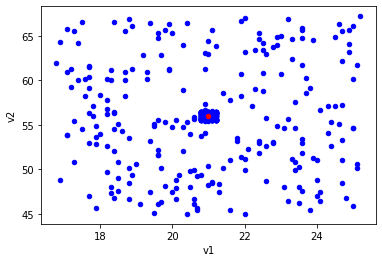

In [9]:
%matplotlib inline

ax = sustancias[['v1', 'v2']].plot.scatter(x='v1', y='v2', c='blue')
ax = veneno[['v1', 'v2']].plot.scatter(x='v1', y='v2', c='red', ax=ax)
ax

**v3 - v4**

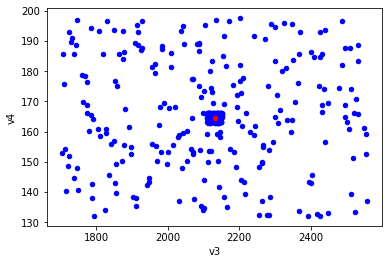

In [10]:
%matplotlib inline

ax = sustancias[['v3', 'v4']].plot.scatter(x='v3', y='v4', c='blue')
ax = veneno[['v3', 'v4']].plot.scatter(x='v3', y='v4', c='red', ax=ax)
ax

Como los valores de veneno son muy parecidos al promedio del dataset, espero que todos lo valores se comporten como en las gráficas de arriba.

<a id='explica'></a>
## Explica la idea general de tu solución con dibujos, diagramas, videos, legos, bolitas de plastilina, etc.

## Solución
De acuerdo a lo encontrado en la exploración, el problema parece poder ser resuelto buscando las sustancias mas cercanas al modelo de sustancia venenosa (veneno.csv).

Por lo tanto necesitamos una métrica de similitud o distancia, para encontrar las sustancias más parecidas al veneno. Se me ocurrieron dos opciones: usar distancia euclidiana o coseno.

Esta imagen puede ayudar a entender la diferencia entre los dos métodos:

![](https://cmry.github.io/sources/eucos.png)

La parte azul es la medida usada por la distancia coseno y la parte roja es la medida usada por la distancia euclidiana.

La imagen la encontré en este excelente artículo que explica sus diferencias muy bien:
[https://cmry.github.io/sources/eucos.png](https://cmry.github.io/sources/eucos.png)

**Proceso**:

* Descubrir mejor métrica
* Calcular la distancia de nuestro target con cada sustancia de los ríos.
* Tomar las 50 más cercanas y alertar a la aldea.

### ¿Qué métrica usar?**

Veamos que métrica nos funciona mejor.


**Euclidean vs Cosine**

$euclidean = \sqrt{\sum^n_{i=1} (x_i - y_i)^2}$ 

VS

$cosine = \frac{x \bullet y}{ \sqrt{x \bullet x} \sqrt{y \bullet y}}$

In [11]:
def euclidean_distance(x, y):   
    return np.sqrt(np.sum((x - y) ** 2))

def cosine_similarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

**Experimentos**

Haremos 3 experimentos por cada métrica:
* Calcular la distancia de dos sustancias muy similares.
* Probaremos con dos sustancias iguales en dimensión 1 pero muy diferentes en dimensión 2.
* Probaremos con dos sustancias diferentes en dimensión 1 e iguales en dimensión 2.

**Vectores de prueba**

In [12]:
ven = np.array([21, 56])
# muy cercano
sus1 = np.array([20, 57])
# igual en v1, lejano en v2
sus2 = np.array([21, 90])
# lejano en v1, igual en v2
sus3 = np.array([9, 56])

**Probando resultados cosenos**

In [13]:
cos1 = cosine_similarity(sus1, ven)
print('cosine 1 = ', cos1)
cos2 = cosine_similarity(sus2, ven)
print('cosine 2 = ', cos2)
cos3 = cosine_similarity(sus3, ven)
print('cosine 3 = ', cos3)

cosine 1 =  0.9997728524910462
cosine 2 =  0.9916215836629095
cosine 3 =  0.9801818334822859


**Probando resultados euclidianos**

In [14]:
euc1 = euclidean_distance(sus1, ven)
print('euclidian 1 = ', euc1)
euc2 = euclidean_distance(sus2, ven)
print('euclidian 2 = ', euc2)
euc3 = euclidean_distance(sus3, ven)
print('euclidian 3 = ', euc3)

euclidian 1 =  1.4142135623730951
euclidian 2 =  34.0
euclidian 3 =  12.0


**Mejor métrica**

Como podemos ver en las pruebas, la métrica que mejor representa los resultados que necesitamos es la distancia euclidiana. La distancia coseno no hace mucho énfasis en vectores con valores iguales en algunos campos.

<a id='implementa'></a>
## Implementa tu solución explicando los pasos que usas.

En este caso en particular nos interesa la magnitud de los vectores y no solo la diferencia en angulo del espacio vectorial, asi que como ya mencionamos usaremos distancia euclideana.

In [15]:
def is_your_river_poisoned(base, sus):
    dist = euclidean_distance(sus, base)
    return dist

Guardamos los resulatdos en `similitud`.

In [16]:
base = veneno.drop('caracteristica', axis=1).values
sustancias['distancia'] = sustancias.drop('id', axis=1).apply(lambda x: 
                         is_your_river_poisoned(base, x.values), axis=1)

<a id='ordena'></a>
## (Opcional) Si crees que es necesario ordenarlas en algún orden específico, indícalo.

Las ordenaré por similitud, los ríos con sustancias mas similares deben ser cerrados primero.

In [17]:
urgent = sustancias.sort_values(by='distancia', axis=0, ascending=True)[:50]

In [20]:
urgent.head(5)

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,distancia
351,374,21.2,56.2,2131.8,164.3,4526.1,1.0,2.1,3.8,535.9,23.6,2.826676
271,135,20.9,56.4,2130.9,163.1,4524.8,1.0,2.1,3.8,536.8,23.8,3.705415
270,320,21.2,55.6,2133.3,164.2,4526.8,1.0,2.1,3.8,541.8,23.8,4.430587
146,417,20.9,56.5,2131.6,163.9,4528.8,1.0,2.1,3.8,533.2,23.8,4.964887
260,265,20.9,55.9,2128.1,166.1,4527.9,1.0,2.1,3.8,541.9,23.8,5.327298


<a id='guarda'></a>
## Guarda las 50 sustancias en un archivo nombrado urgente_orden_de_cierre.csv

In [19]:
urgent.to_csv('soluciones/urgente_orden_de_cierre.csv')